# Title: Handling Missing Values through CCA(Complete Case Analysis)

`What is CCA?`

Complete Case Analysis (CCA) in the context of machine learning and statistics refers to a method of handling missing data. In CCA, only the observations (cases) that have complete information for all the variables of interest are included in the analysis, and any observations with missing values in any variable are excluded.


## Aim:

Remove missing values through CCA.

## Strategy:

If columns have missing percentage of less than 5%, then they are removed. But if the values are missing at random, then removing that values not effect the dataset, Otherwise it will effect due to reduction of sample size or bias in analysis.

Here we will remove values from those columns which are less than 5%. Then we will see missing values was random or not. For numerical and categorical, estimating randomness is done through different approches.

- For `numeric columns`: Plot histplots and see distributions before and after removing missing values are same or not. Minor change can be accepted.

- For `categoric columns`: Calculate frequency of categories before and after removing missing values. Minor increase or decrease can be accepted.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
df = pd.read_csv("data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [27]:
# missing values percentages
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

Separate column having missing values less than 5%

In [14]:
cols = [col for col in df.columns if (df[col].isnull().sum()/len(df)*100)<5 and ((df[col].isnull().sum()/len(df)*100)>0)]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [17]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
142,0.920,no_enrollment,Graduate,9.0,15.0
16831,NaN,no_enrollment,Graduate,4.0,138.0
7090,0.682,no_enrollment,Graduate,1.0,284.0
11460,0.893,no_enrollment,Graduate,3.0,258.0
13696,0.897,no_enrollment,Masters,13.0,80.0


Check how much data will loss after removing missing values

In [19]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

Removing missing values and create new dataframe

In [20]:
new_df = df[cols].dropna()

Comparing both dataset before and after removing missing values

In [21]:
df.shape, new_df.shape

((19158, 13), (17182, 5))

In [22]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
training_hours            float64
target                    float64
dtype: object

### Check distribution of `numerical columns`

In [23]:
# separating numerical columns
numeric_cols = [col for col in cols if df[col].dtype=="float64"]
numeric_cols

['city_development_index', 'experience', 'training_hours']

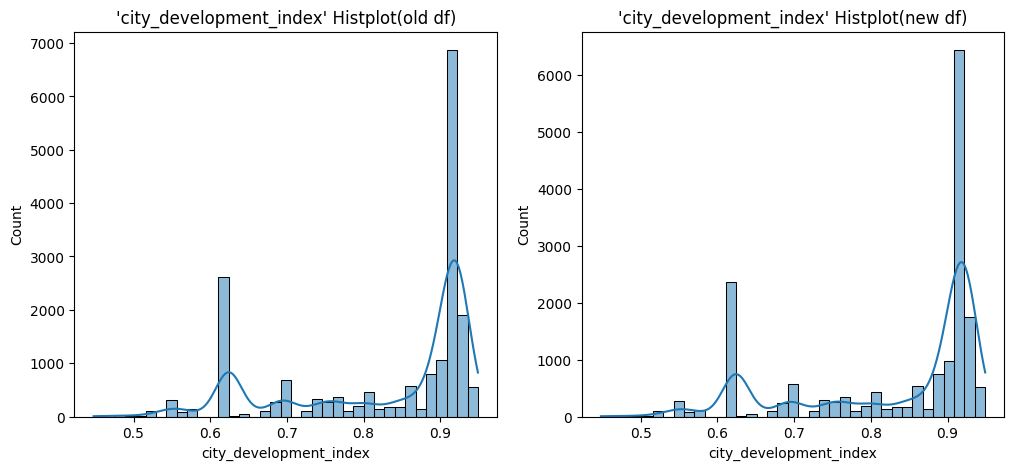

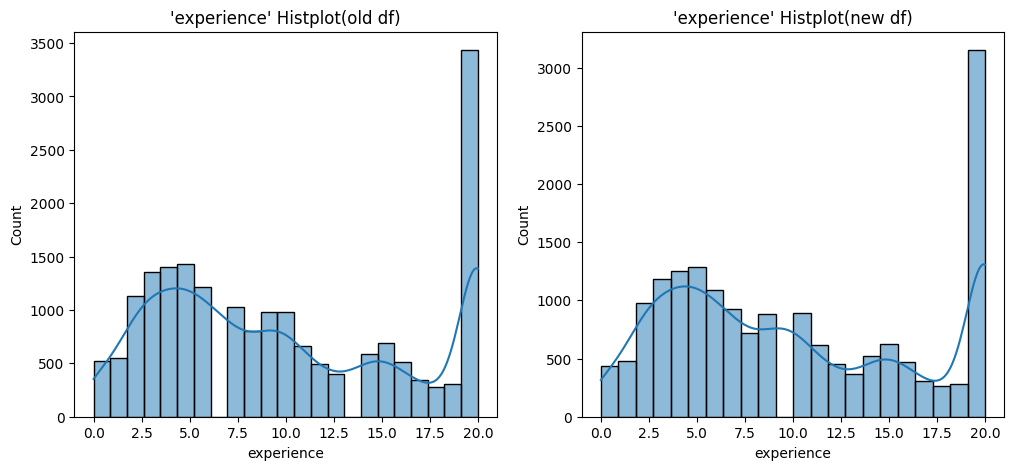

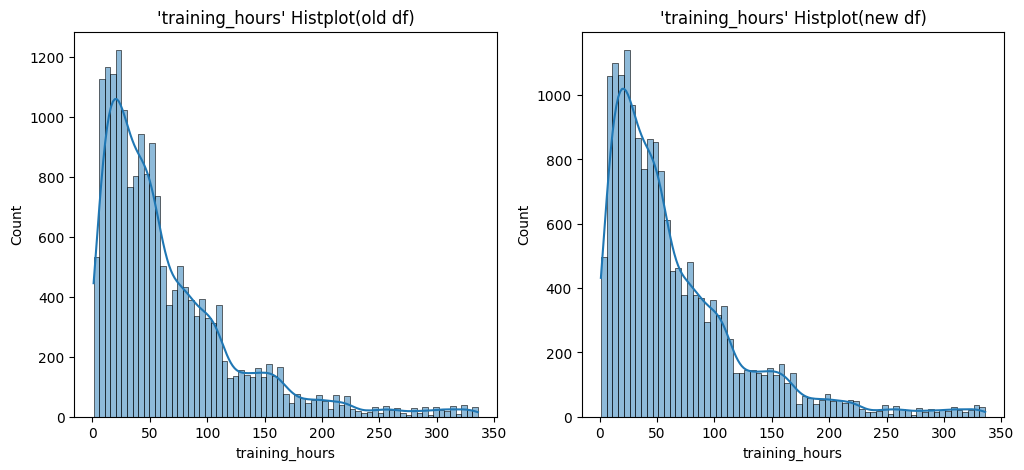

In [25]:
for col in numeric_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
    # old df ============
    # histplot
    sns.histplot(x=df[col], kde=True, ax=ax1)
    ax1.set_title(f"'{col}' Histplot(old df)")
    # new df ============
    # histplot
    sns.histplot(x=new_df[col], kde=True, ax=ax2)
    ax2.set_title(f"'{col}' Histplot(new df)")

<p style="color:lightgreen;font-weight:900;">Numeric columns distribution are same, have minor change. So we can say that values are missing at random</p>

### Check `categorical column`

In [26]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [31]:
temp = pd.concat([
    df['education_level'].value_counts() / len(df),
    new_df['education_level'].value_counts() / len(new_df)
], axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [32]:
temp = pd.concat([
    df['enrolled_university'].value_counts() / len(df),
    new_df['enrolled_university'].value_counts() / len(new_df)
], axis=1)
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


<p style="color:lightgreen;font-weight:900;">Categorical columns have frequency of categories almost same, have minor change. So we can say that values are missing at random</p>

#### End of Code!